# Nearest neighbors

This notebook illustrates the classification of the nodes of a graph by the [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), based on the labels of a few nodes.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.classification import KNN
from sknetwork.embedding import GSVD
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Graphs

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

**Classification**

In [5]:
seeds = {i: labels_true[i] for i in [0, 33]}

In [6]:
knn = KNN(GSVD(3), n_neighbors=1)
labels_pred = knn.fit_transform(adjacency, seeds)

In [7]:
precision = np.round(np.mean(labels_pred == labels_true), 2)
precision

0.97

In [8]:
image = svg_graph(adjacency, position, labels=labels_pred, seeds=seeds)

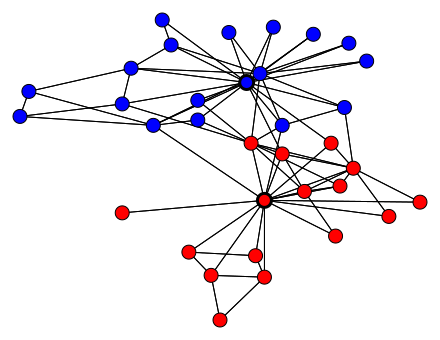

In [9]:
SVG(image)

**Soft classification**

In [10]:
knn = KNN(GSVD(3), n_neighbors=2)
knn.fit(adjacency, seeds)
membership = knn.membership_

In [11]:
scores = membership[:,1].toarray().ravel()

In [12]:
image = svg_graph(adjacency, position, scores=scores, seeds=seeds)

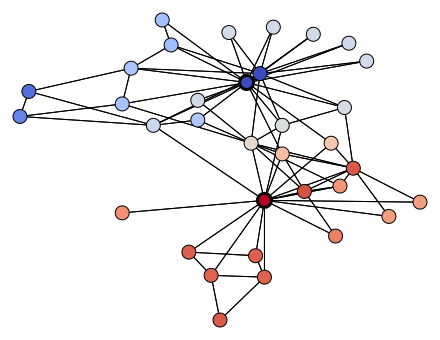

In [13]:
SVG(image)

## Digraphs

In [14]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

**Classification**

In [15]:
rembrandt = 5
klimt = 6
cezanne = 11
seeds = {cezanne: 0, rembrandt: 1, klimt: 2}

In [16]:
knn = KNN(GSVD(3), n_neighbors=2)
labels = knn.fit_transform(adjacency, seeds)

In [17]:
image = svg_digraph(adjacency, position, names, labels, seeds=seeds)

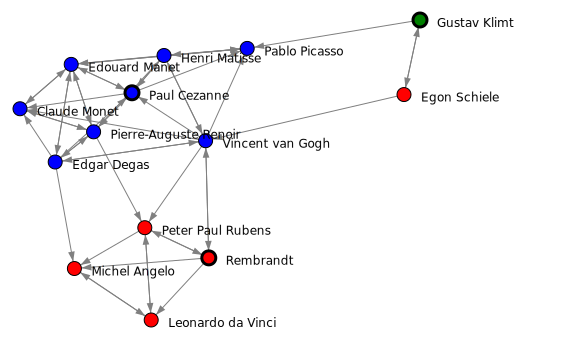

In [18]:
SVG(image)

**Soft classification**

In [19]:
membership = knn.membership_

In [20]:
scores = membership[:,0].toarray().ravel()

In [21]:
image = svg_digraph(adjacency, position, names, scores=scores, seeds=[cezanne])

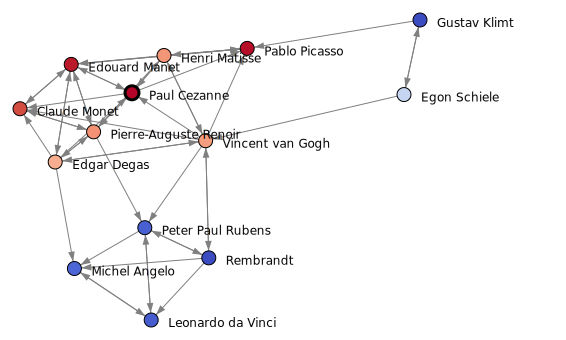

In [22]:
SVG(image)

## Bipartite graphs

In [23]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

**Classification**

In [24]:
inception = 0
drive = 3
budapest = 8

In [25]:
seeds_row = {inception: 0, drive: 1, budapest: 2}

In [26]:
knn = KNN(GSVD(3), n_neighbors=2)
labels_row = knn.fit_transform(biadjacency, seeds_row)
labels_col = knn.labels_col_

In [27]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row, labels_col, seeds_row=seeds_row)

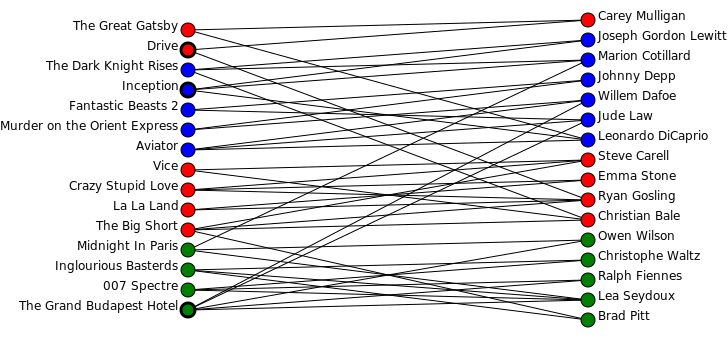

In [28]:
SVG(image)

**Soft classification**

In [29]:
membership_row = knn.membership_row_
membership_col = knn.membership_col_

In [30]:
scores_row = membership_row[:,1].toarray().ravel()
scores_col = membership_col[:,1].toarray().ravel()

In [31]:
image = svg_bigraph(biadjacency, names_row, names_col, scores_row=scores_row, scores_col=scores_col, 
                    seeds_row=seeds_row)

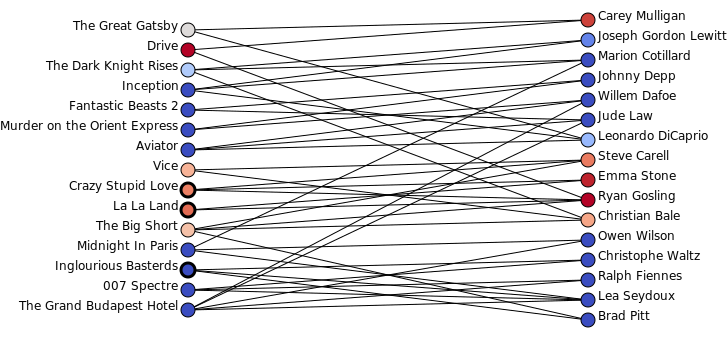

In [32]:
SVG(image)